# Transcript B from Lecture, February 14, 2023

In [2]:
import sys

########################################
# Change the string in the line below! #
########################################
sys.path.append("/Users/gilbert/Documents/CS111-2023-winter/Python") 

import os
import time
import math
import numpy as np
import numpy.linalg as npla
import scipy
from scipy import linalg as spla
import scipy.sparse
import scipy.sparse.linalg
from scipy import integrate
import networkx as nx
import cs111

##########################################################
# If this import for matplotlib doesn't work, try saying #
#   conda install -c conda-forge ipympl                  #
# at a shell prompt on your computer                     #
##########################################################
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

np.set_printoptions(precision = 4)

# Singular value decomposition: SVD

The **singular value decomposition** of an arbitrary $m$-by-$n$ matrix $A$ is

$$A = USV^T,$$

where $U$ is an $m$-by-$m$ orthogonal matrix ($U$'s columns $u_0$, $u_1$, $\ldots$, $u_{m-1}$ all have length 1 and are perpendicular to each other, so that $U^TU=I$); and $V$ is an $n$-by-$n$ orthogonal matrix ($V^TV=I$, where now the $v_i$ are columns of $V$ and thus _rows_ of $V^T$); and $S$ is an $m$-by-$n$ diagonal matrix, whose diagonal elements are $\sigma_0 \ge \sigma_1 \ge \ldots \ge \sigma_{\min(m,n)-1}\ge 0$. The $\sigma_i$'s are called the _singular values_ of $A$.

In [3]:
# A small example

V = np.array([[12/13, 5/13], [-5/13, 12/13]])
print('V:\n',V)
print()

U = np.array([[4/5, -3/5], [3/5, 4/5]])
print('U:\n',U)
print()

sigma =[5,1]
print('sigma:', sigma)
print()

S = np.diag(sigma)
print('S:\n', S)
print()

A = U @ S @ V.T
print('A:\n', A)

V:
 [[ 0.9231  0.3846]
 [-0.3846  0.9231]]

U:
 [[ 0.8 -0.6]
 [ 0.6  0.8]]

sigma: [5, 1]

S:
 [[5 0]
 [0 1]]

A:
 [[ 3.4615 -2.0923]
 [ 3.0769 -0.4154]]


In [4]:
U @ U.T

array([[1., 0.],
       [0., 1.]])

In [5]:
V @ V.T

array([[1., 0.],
       [0., 1.]])

In [6]:
A @ V

array([[ 4. , -0.6],
       [ 3. ,  0.8]])

In [7]:
U @ S

array([[ 4. , -0.6],
       [ 3. ,  0.8]])

<b> SVD of a random 8-by-5 matrix

In [8]:
A = np.random.rand(8,5)
A

array([[0.6805, 0.282 , 0.5037, 0.3215, 0.306 ],
       [0.2173, 0.0332, 0.3094, 0.2458, 0.1808],
       [0.2844, 0.9761, 0.93  , 0.5894, 0.5109],
       [0.612 , 0.8296, 0.5528, 0.6991, 0.273 ],
       [0.5296, 0.358 , 0.2676, 0.1897, 0.0486],
       [0.5466, 0.912 , 0.7365, 0.9607, 0.4241],
       [0.1061, 0.438 , 0.515 , 0.8893, 0.9375],
       [0.4041, 0.1368, 0.1314, 0.989 , 0.0657]])

The scipy routine spla.svd(A) returns the three elements of the SVD, but not exactly in the form $A=USV^T$. Instead, spla.svd() returns the matrix $U$, then a vector of the $\min(m-1, n-1)$ singular values, then the matrix $V^T$ (not $V$). 

In [9]:
spla.svd?

<b>Use spla.svd() to compute the SVD and then form the actual matrices $U$, $S$, and $V$.

In [10]:
print('shape of A:', A.shape)
print()

U,sigma,Vt = spla.svd(A)

print('shape of U:', U.shape)
print('sigma:', sigma)
print('shape of Vt:', Vt.shape)

shape of A: (8, 5)

shape of U: (8, 8)
sigma: [3.2581 0.8445 0.8103 0.4992 0.222 ]
shape of Vt: (5, 5)


In [11]:
S = np.zeros(A.shape)
for i in range(len(sigma)):
    S[i,i] = sigma[i]
V = Vt.T

print('\nU:\n', U)
print('\nS:\n', S)
print('\nV:\n', V)


U:
 [[-0.2726  0.2965  0.1453 -0.7167  0.0558 -0.2715  0.4737  0.0427]
 [-0.1323 -0.0328  0.0584 -0.3602  0.5682  0.315  -0.4634 -0.4598]
 [-0.4636  0.1522 -0.5328  0.2286  0.4451 -0.3277 -0.1223  0.3246]
 [-0.4172  0.2805  0.107   0.2154 -0.4133 -0.3574 -0.2261 -0.5828]
 [-0.1861  0.4102  0.1646 -0.1788 -0.3232  0.3267 -0.5064  0.52  ]
 [-0.509   0.0642  0.044   0.2905  0.0202  0.6494  0.4703 -0.0842]
 [-0.3983 -0.7349 -0.2433 -0.3088 -0.3597  0.0175 -0.1149  0.0615]
 [-0.2585 -0.311   0.7693  0.215   0.2663 -0.2513 -0.0625  0.2457]]

S:
 [[3.2581 0.     0.     0.     0.    ]
 [0.     0.8445 0.     0.     0.    ]
 [0.     0.     0.8103 0.     0.    ]
 [0.     0.     0.     0.4992 0.    ]
 [0.     0.     0.     0.     0.222 ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.    ]]

V:
 [[-0.3453  0.5426  0.5207 -0.5026 -0.2502]
 [-0.4974  0.3608 -0.3586  0.5666 -0.4156]
 [-0.4616  0.2054 -0.3614 -0.2112  0.7547]
 [-0.5584 -0.5

In [12]:
print('norm of difference between U.T @ U     and I:', npla.norm(U.T @ U - np.eye(A.shape[0])))
print('norm of difference between V.T @ V     and I:', npla.norm(V.T @ V - np.eye(A.shape[1])))
print('norm of difference between U @ S @ V.T and A:', npla.norm(U @ S @ V.T - A) )

norm of difference between U.T @ U     and I: 1.7706981164910314e-15
norm of difference between V.T @ V     and I: 1.4676375744040777e-15
norm of difference between U @ S @ V.T and A: 2.573880721974471e-15


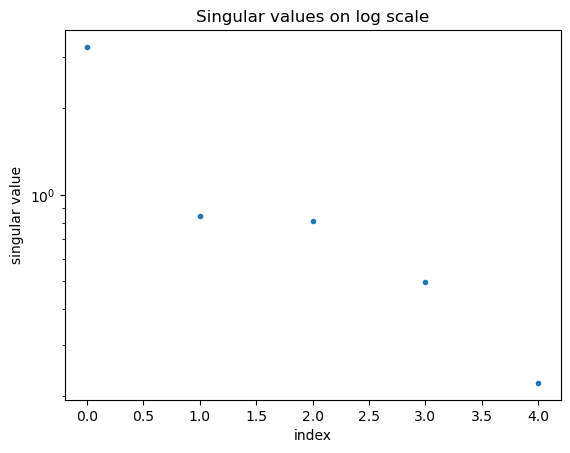

In [13]:
fig0 = plt.figure()
plt.plot(sigma,'.')
plt.yscale('log')
plt.title('Singular values on log scale')
plt.ylabel('singular value')
plt.xlabel('index')
print()

# SVD theorems

In [14]:
A = np.random.rand(8,5)
print('shape of A:', A.shape)
print()

U,sigma,Vt = spla.svd(A)

print('shape of U:', U.shape)
print('sigma:', sigma)
print('shape of Vt:', Vt.shape)


shape of A: (8, 5)

shape of U: (8, 8)
sigma: [3.1342 1.0385 0.7798 0.4365 0.3541]
shape of Vt: (5, 5)


<h3>Theorem 1. The rank of $A$ is the number of nonzero singular values.</h3>

In our example, sure enough, the matrix $A$ has rank 5.

In [15]:
print('singular values:', sigma)
print('rank(A):', npla.matrix_rank(A))

singular values: [3.1342 1.0385 0.7798 0.4365 0.3541]
rank(A): 5


In floating-point arithmetic, what counts as "nonzero" can be a judgement call. To illustrate this, we form a new 8-by-5 matrix $B$ whose first 4 columns are the same as $A$ and whose 5th column is the sum of the first 4 columns. 

In [16]:
B = A.copy()
B[:,4] = A @ [1, 1, 1, 1, 0]
# can you see why this replaces column 4 of B with the sum of the first 4 columns of A?

print('B:\n', B)
print()
print('B @ [1, 1, 1, 1, -1] should be the zero vector:', B @ [1, 1, 1, 1, -1])
print()
print('norm of B @ [1, 1, 1, 1, -1]:', npla.norm(B @ [1, 1, 1, 1, -1]))

B:
 [[0.208  0.1337 0.2438 0.4014 0.9869]
 [0.9086 0.1326 0.5008 0.4871 2.0291]
 [0.1267 0.0727 0.4328 0.5225 1.1548]
 [0.7742 0.2808 0.7063 0.6221 2.3834]
 [0.5653 0.8832 0.1495 0.7688 2.3669]
 [0.7327 0.1008 0.8524 0.1675 1.8535]
 [0.3542 0.184  0.2892 0.1765 1.0038]
 [0.6872 0.1401 0.2314 0.833  1.8918]]

B @ [1, 1, 1, 1, -1] should be the zero vector: [0.0000e+00 0.0000e+00 0.0000e+00 1.1102e-16 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00]

norm of B @ [1, 1, 1, 1, -1]: 1.1102230246251565e-16


Mathematically speaking, $B$ should have rank 4 because one column is linearly dependent on the other four columns. In floating-point arithmetic, though, round-off error makes the last column not quite exactly equal to the sum of the others. The exact rank of this perturbed matrix is 5, and sure enough all of its computed singular values are nonzero. 

In [17]:
UB, sigmaB, VtB = spla.svd(B)
print('singular values of B:', sigmaB)

singular values of B: [5.7102e+00 9.2696e-01 5.1527e-01 4.3104e-01 1.9230e-16]


However, because only 4 of the singular values are significantly larger than machine epsilon, we (and numpy) say that $B$ has "numerical rank" 4.

In [18]:
npla.matrix_rank(B)

4

We defined the 2-norm of a matrix a while ago, 
but we never talked about algorithms to compute it.
It turns out that the SVD gives us an algorithm.

<h3>Theorem 2. The 2-norm $||A||_2$ is equal to the largest singular value $\sigma_0$.</h3>

This is because the norm of $A$ is the largest stretch it applies to any vector, 

$$||A||_2 = \max_x (||Ax||_2/||x||_2).$$

We saw that $A$ maps the unit sphere to an ellipsoid, and the largest stretch happens at the longest axis of the ellipsoid, whose length is $\sigma_0$. The actual vectors are $x=v_0$ and $Ax = \sigma_0 u_0$.

In [19]:
V = Vt.T

v0 = V[:,0]
u0 = U[:,0]

print('singular values of A:', sigma)
print('2-norm of A:', npla.norm(A,2))
print()

print('v_0:', v0)
print('u_0:', u0)
print()
print('A @ v_0      :', A@v0)
print('sigma_0 * u_0:', sigma[0] * u0)


print()
print('norm(A @ v_0) / norm(v_0) :', npla.norm(A@v0, 2) / npla.norm(v0, 2))

singular values of A: [3.1342 1.0385 0.7798 0.4365 0.3541]
2-norm of A: 3.134221241399855

v_0: [-0.5222 -0.2057 -0.3956 -0.4547 -0.5673]
u_0: [-0.1942 -0.4733 -0.3215 -0.5003 -0.2978 -0.3046 -0.2476 -0.3765]

A @ v_0      : [-0.6088 -1.4835 -1.0076 -1.5681 -0.9334 -0.9548 -0.7759 -1.1802]
sigma_0 * u_0: [-0.6088 -1.4835 -1.0076 -1.5681 -0.9334 -0.9548 -0.7759 -1.1802]

norm(A @ v_0) / norm(v_0) : 3.1342212413998554


<h3><center> Condition number</center></h3>
    
The SVD also gives us a way to compute the condition number of $A$ in the 2-norm, $\kappa_2(A)$.
Recall the definition

$$\kappa(A) = \max(\mbox{stretch}) / \min(\mbox{stretch}),$$

the ratio of the maximum amount any vector is stretched by $A$ to the minimum amount 
any vector is stretched by $A$. 

The minimum is 0 if $A$ is square and singular, 
or more generally if the rank of $A$ is less than the number of columns,
and in that case the condition number is infinite.
If $A$ is square and nonsingular, the condition number is 
    
$$\kappa(A) = ||A||\cdot||A^{-1}||.$$

From the discussion of $||A||_2$ above, it is clear that

<h3>Theorem 3. The 2-norm condition number  $\kappa_2(A)$ is equal to the ratio of the largest and smallest singular values,</h3>

$$\kappa_2(A) = \sigma_0 / \sigma_{\min(m,n)-1}$$

In [20]:
print('ratio of extreme singular values: ', sigma[0]/sigma[-1])
#print('2-norm condition number of matrix:', npla.cond(A,2))


ratio of extreme singular values:  8.852137620377821


In [21]:
# numpy's condition number routine works for non-square matrices in some numpy versions but not others.

npla.cond(A,2)

8.852137620377823

The _Frobenius norm_ of a matrix is the square root of the sum of the squares of all
of its elements. It's as if we took the whole $m$-by-$n$ matrix as a vector in $mn$-dimensional space and computed its Euclidean length. This is an easy norm to compute, so we often use it to compare two matrices with each other. It turns out the SVD gives the Frobenius norm too.

<h3>Theorem 4. The Frobenius norm $||A||_F=(\sum_i\sum_j a_{ij}^2)^{1/2}$ is equal to $(\sum_i \sigma_i^2)^{1/2}$.

In [22]:
sumsig = 0
for i in range(len(sigma)):
    sumsig += sigma[i]**2
print('sqrt(sum(singular values squared)):', np.sqrt(sumsig))

nrows, ncols = A.shape
sumsqA = 0
for i in range(nrows):
    for j in range(ncols):
        sumsqA += A[i,j]**2
print('sqrt(sum(matrix elements squared)):', np.sqrt(sumsqA))

print('Frobenius norm of matrix:          ', npla.norm(A,'fro'))


sqrt(sum(singular values squared)): 3.4388669141165162
sqrt(sum(matrix elements squared)): 3.4388669141165176
Frobenius norm of matrix:           3.4388669141165176


In [23]:
# The default norm for npla.norm() is the Frobenius norm:

npla.norm(A)

3.4388669141165176

The determinant of a matrix is important in matrix theory, 
but is hardly ever computed in numerical linear algebra where matrix norms and
condition numbers are more useful.
However, the SVD does give a way to compute the determinant of a (square) matrix,
up to its sign.

<h3>Theorem 5. The determinant of a square matrix is $\pm$ the product of its singular values, $\prod_i \sigma_i$.</h3>

In [24]:
Asquare = A[:5,:]
print('shape of square matrix:', Asquare.shape)
UAs, sigmaAs, VtAs = npla.svd(Asquare)

prodsig = 1
for i in range(len(sigmaAs)):
    prodsig *= sigmaAs[i]
print('product of singular values:', prodsig)

print('determinant of matrix:     ', npla.det(Asquare))


shape of square matrix: (5, 5)
product of singular values: 0.016881483566176535
determinant of matrix:      0.016881483566176532


# Sum of rank-1 matrices, and low-rank approximation

Our next theorem is just a simple way to rewrite the SVD equation $A=USV^T$.
Recall that $u_i$ is column $i$ of $U$ and $v_i$ is column $i$ of $V$, so $v_i^T$ is row $i$ of $V^T$.
It is straightforward to check algebraically that

<h3>Theorem 6. Matrix $A$ is the sum of rank-1 matrices: $A = \sum_{i=0}^{\min(m,n)}\sigma_i u_i v_i^T$ </h3>

Each term in the sum is a scalar multiple of the outer product $u_i v_i^T$,
which is an $m$-by-$n$ matrix whose rank is 1;
it's essentially the multiplication table of the elements of $u_i$ (as rows) times
the elements of $v_i$ (as columns).
(Indeed, every matrix product $AB$ can be written as a sum of rank-1 matrices, 
each of which is the outer product of a column of $A$ and a row of $B$.)

Though it's just a humble algebraic identity, this last theorem actually motivates
the greatest applications of SVD in data analysis. 
We'll see that in the next section, but first let's just check the theorem numerically 
for our example matrix.

We ought to be able to compute $u_i v_i^T$ as U[:,i] @ V[:,i].T in numpy.
Unfortunately numpy is broken here -- it gets confused because it can't tell that U[:,i] is a column vector and V[:,i].T is a row vector, and it does the wrong thing.
(Matlab on the other hand gets this right.)
In numpy, we have to use the np.outer() function to compute the outer product of two vectors,
as we do below.

In [25]:
Asum = np.zeros(A.shape)
for i in range(len(sigma)):
    Asum += sigma[i] * np.outer(U[:,i], V[:,i])

print('norm of difference between Asum and A:',  npla.norm(Asum - A))

norm of difference between Asum and A: 5.644149362314962e-15


What happens if we truncate the sum in Theorem 6 (above) after some number $k<\min(m,n)$ of terms? Let us define

$$A_k = \sum_{i=0}^{k-1}\sigma_i u_i v_i^T,$$

with $A_{\min(m,n)} = A$.
We can think of each rank-1 term $\sigma_i u_i v_i^T$ as adding some "weight" to the matrix, in an informal sense. The terms are added in order of decreasing weight, because $\sigma_0 \ge \sigma_1 \ge \cdots$. If the first singular values are much larger than the later ones, we might hope that $A_k$ would be a good approximation to $A$ for small values of $k$. This turns out to be true in a very strong sense: $A_k$ is the _best_ possible rank-$k$ approximation to $A$, as measured in either the 2-norm or the Frobenius norm.

<h3> Theorem 7. Among all $m$-by-$n$ matrices $B_k$ that have rank $k$, 
the minimum possible value of $||A-B_k||_2$ is attained when $B_k=A_k$ as defined above.
That value is $||A-A_k||_2 = \sigma_{k}$.</h3>

<h3> Theorem 8. Among all $m$-by-$n$ matrices $B_k$ that have rank $k$, 
the minimum possible value of $||A-B_k||_F$ is attained when $B_k=A_k$.
That value is $||A-A_k||_F = (\sum_{i\ge k}\sigma_{k}^2)^{1/2}$. </h3>

For the case $k=0$, we get the results of Theorems 2 and 4 above. 
For $k\ge \mbox{rank}(A)$, we get $A=A_k$.

We illustrate Theorem 7 with our sample 8-by-5 matrix.

In [26]:
nrows, ncols = A.shape
print('shape of A:', (nrows, ncols))

U,sigma,Vt = spla.svd(A)

print('singular values:', sigma)
print('rank(A):', npla.matrix_rank(A))
print()

Ak = np.zeros(A.shape)
for k in range(len(sigma)):
    print('rank', npla.matrix_rank(Ak), 'approximation: 2-norm(A%d - A) =' % k, npla.norm(Ak-A,2))
    Ak += sigma[k] * np.outer(U[:,k], Vt[k,:])
print('rank', npla.matrix_rank(Ak), 'approximation: 2-norm(A%d - A) =' % len(sigma), npla.norm(Ak-A,2))


shape of A: (8, 5)
singular values: [3.1342 1.0385 0.7798 0.4365 0.3541]
rank(A): 5

rank 0 approximation: 2-norm(A0 - A) = 3.134221241399855
rank 1 approximation: 2-norm(A1 - A) = 1.038481173610056
rank 2 approximation: 2-norm(A2 - A) = 0.7798329547515089
rank 3 approximation: 2-norm(A3 - A) = 0.4364849626735341
rank 4 approximation: 2-norm(A4 - A) = 0.3540637725948599
rank 5 approximation: 2-norm(A5 - A) = 4.618158061901078e-15
